# Introduction

**Problem statement** <br>
Use the UCI PIMA Indian Diabetes dataset to predict whether a person has diabetes by using the medical attributes provided.

**Assumptions**
1. This is enough data to reliably predict if the patient has diabetes. The dataset has only 786 data points so further testing would be required to confirm the model's predictive power.
2. Just these attributes are enough to diagnose the ailment.



In [2]:
# Importing required libraries to get started
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

# Data Exploration

Lets pull in the data and see what's in it. Here is what we already know about this data: <br>

## Data Overview


**Columns**

1. Pregnancies - Number of times pregnant 

2. Glucose - Plasma glucose concentration at 2 hours in an oral glucose tolerance test 

3. BloodPressure - Diastolic blood pressure (mm Hg) 

4. SkinThickness - Triceps skin fold thickness (mm) 
5. Insulin - 2-Hour serum insulin (mu U/ml) 
6. BMI - Body mass index (weight in kg/(height in m)^2) 
7. DiabetesPedigreeFunction - A measure of how much diabetes there has been in the person's family tree
8. Age - Age (years) 
9. Outcome - Class variable (0 or 1) class value 1 is interpreted as "tested positive for
   diabetes"
   
**Class distribution:** <br>
0 : 500 <br>
1 :  268 <br>

**Data characteristics:**
* The database contains only data about **female** patients who are of **Pima Indian heritage** and are **21 or older**
* All the attributes are numeric
* The data may contain invalid or null values
* Total number of cases presented are 786

In [12]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
data["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A pairs plot allows us to see both the distribution of individual variables (along the diagonal) and correlations between each pair of variables. Pair plots are a great method to identify trends for follow-up analysis.  We'll use Seaborn to do the plot.

<Figure size 2000x2000 with 0 Axes>

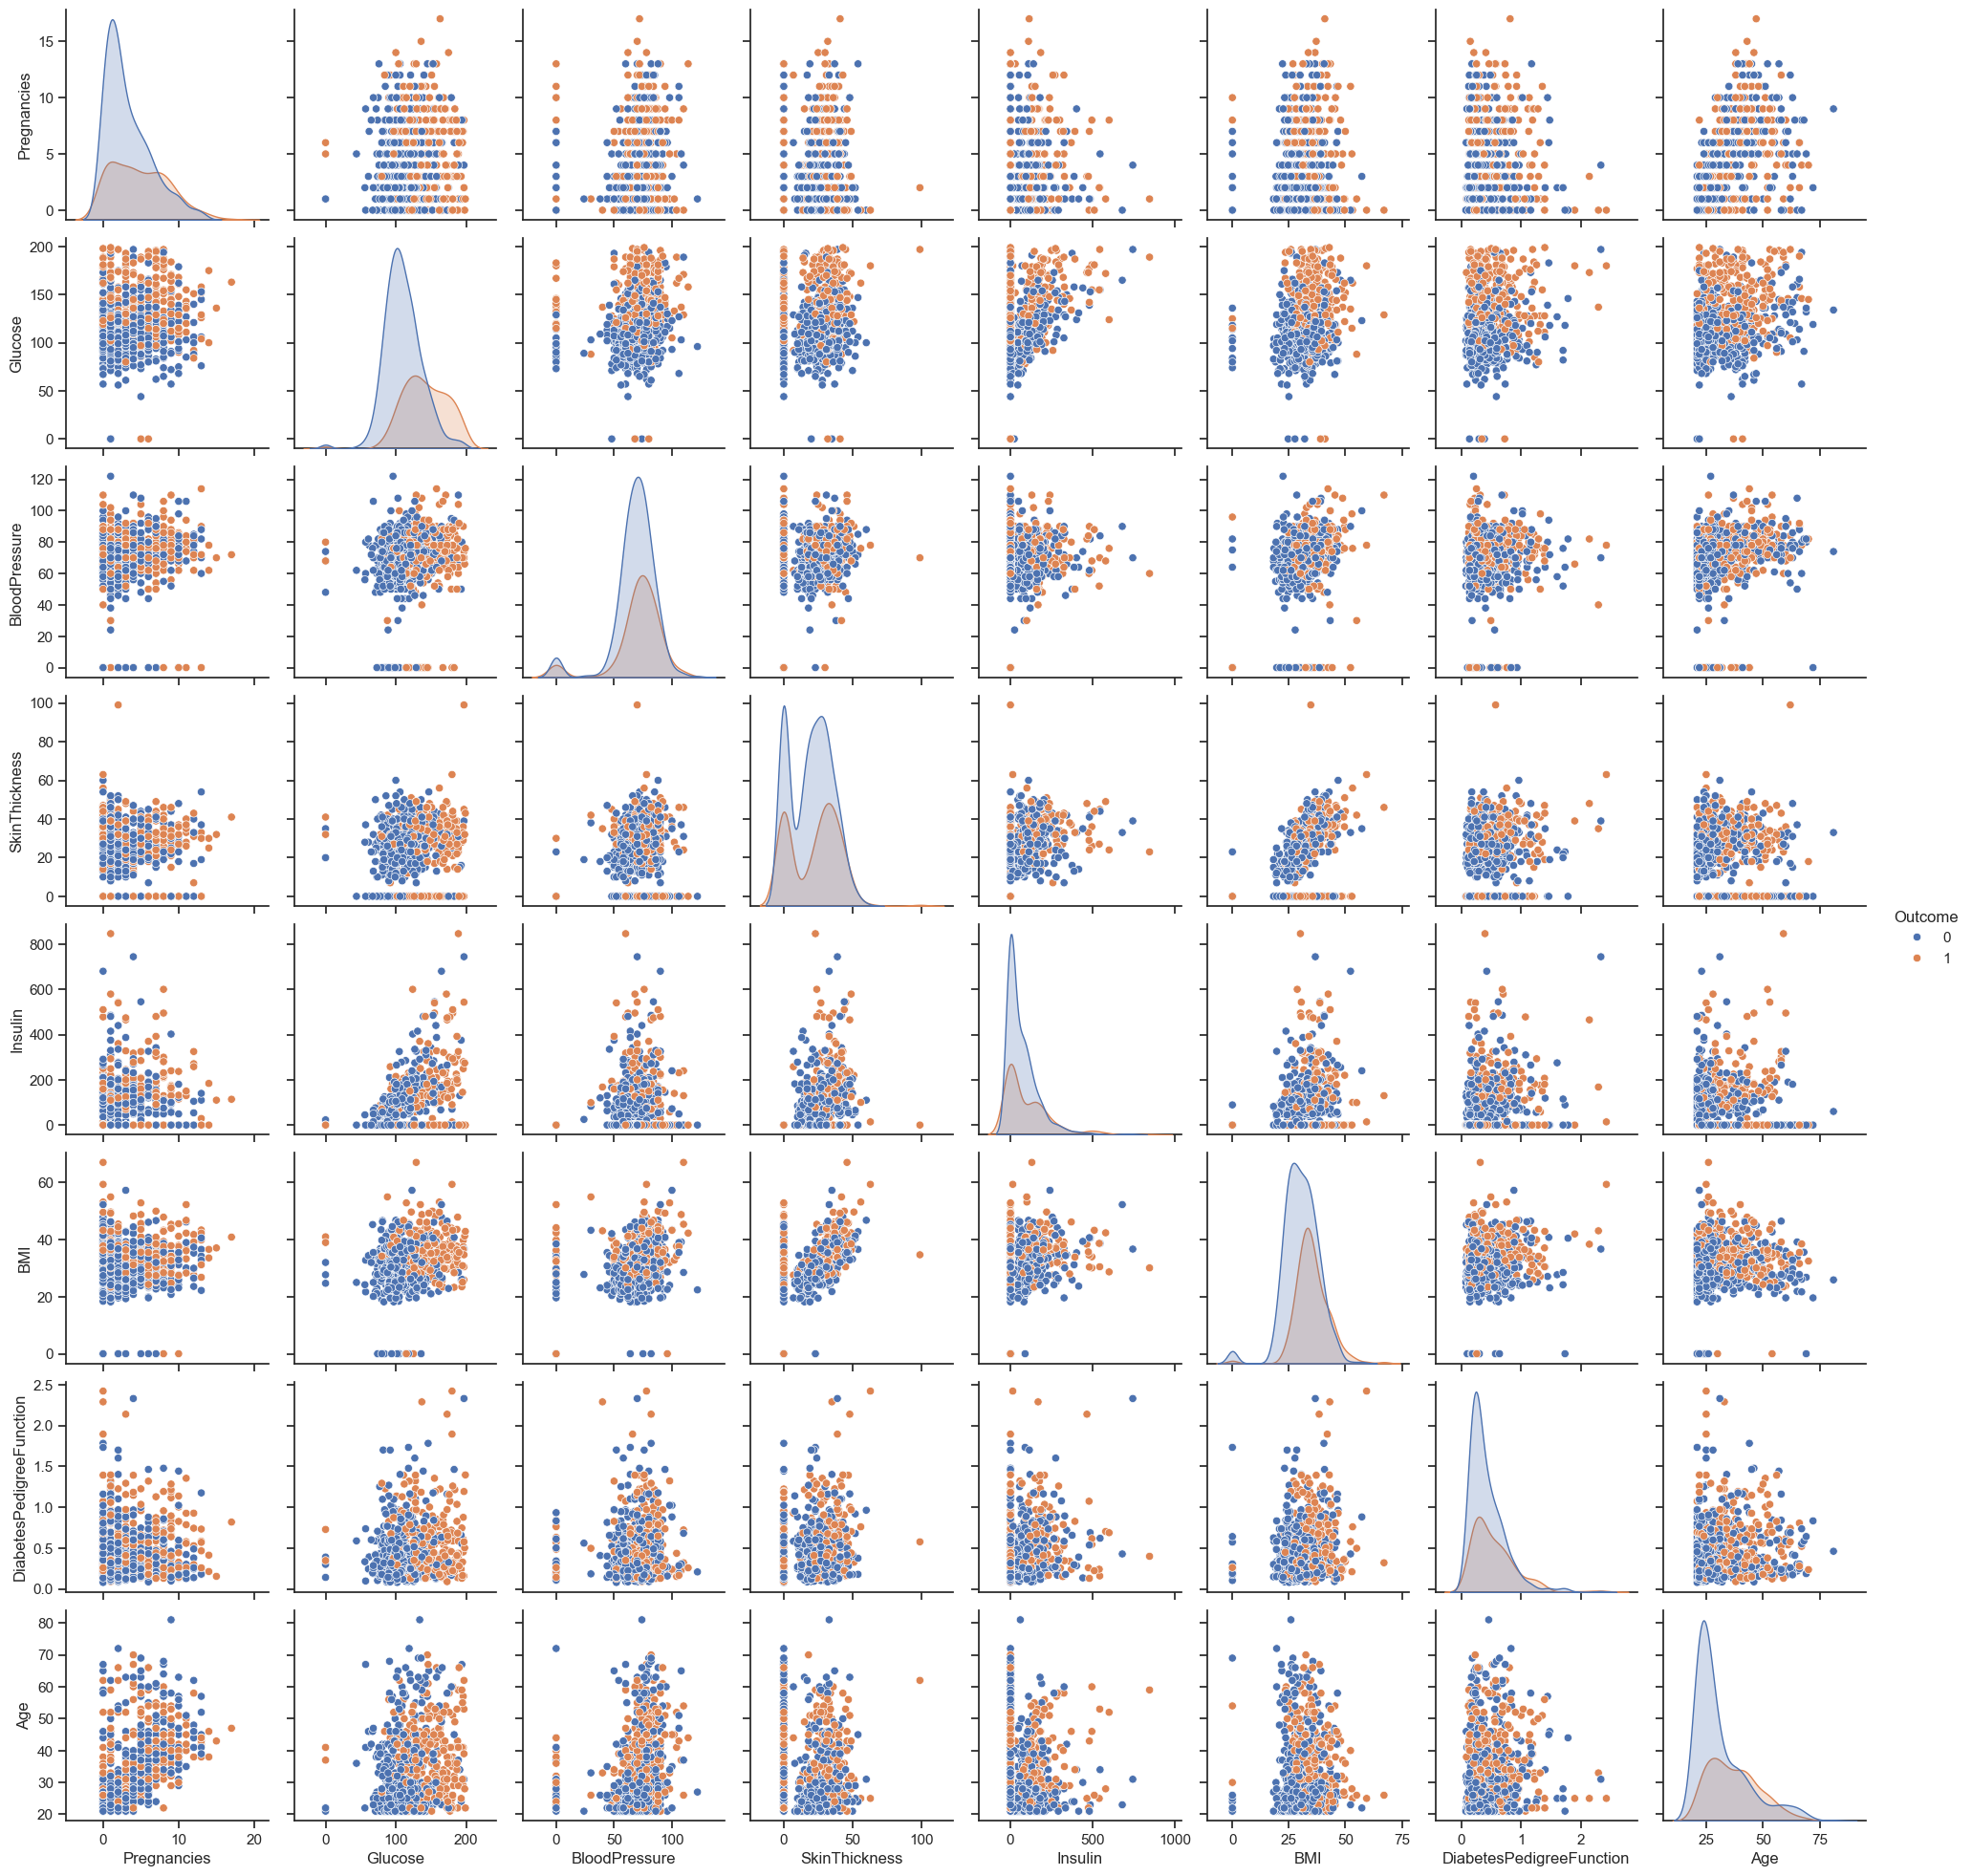

In [5]:
sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='Outcome')



## Invalid data
If we look at the results of the data.describe() we will see that Plasma glucose levels, blood pressure, skin thickness, insulin and BMI all have some values at 0 which does not make sense for a living person.

1. Blood Pressure: <br>
Based on the information provided for blood pressure in adults on wikipedia (https://en.wikipedia.org/wiki/Blood_pressure#Classiﬁcation), any diastolic blood pressure (bp) under 60 is considered hypotension which needs to be treated immediately as it indicates not enough blood is reaching the person's organs; the person is considered to be in "shock". Browsing more on this subject, there are some cases where the diastolic bp can be lower than this while not exhibiting signs of hypotension, but that's mostly rare. The diastolic blood pressure can be low in a case the person is sleeping too. In any case, the 0 values are clearly invalid. Let’s ﬁnd out how many cases we have of this.

In [34]:
# Number of rows where BloodPressure is 0
print(data[data.BloodPressure == 0].shape[0])
# Display the indices of rows where BloodPressure is 0
print(data[data.BloodPressure == 0].index.tolist())
# How many people identified as diabetic where 'BloodPressure' is 0
print(data[data.BloodPressure == 0]["Outcome"].value_counts())
#print(data[data.BloodPressure == 0].groupby('Outcome')['Age'].count())
#data[data.BloodPressure == 0].head(35)

35
[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 601, 604, 619, 643, 697, 703, 706]
Outcome
0    19
1    16
Name: count, dtype: int64


2. Plasma Glucose Levels: <br>
The range is normally 3.9 to 7.2 for non-diabetic patients even after fasting [[Source]](https://en.wikipedia.org/wiki/Blood_sugar_level). Given this, the 0's here are not valid either. Number of cases of this:

In [35]:
print(data[data.Glucose == 0].shape[0])
print(data[data.Glucose == 0].index.tolist())
print(data[data.Glucose == 0]["Outcome"].value_counts())
#print(data[data.Glucose == 0].groupby('Outcome')['Age'].count())

5
[75, 182, 342, 349, 502]
Outcome
0    3
1    2
Name: count, dtype: int64


3.Skin Fold Thickness: <br>
    For normal healthy adults the skin fold thinkness is not less than 10mm [[source]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083983/)

In [36]:
print(data[data.SkinThickness == 0].shape[0])
print(data[data.SkinThickness == 0].index.tolist())
print(data[data.SkinThickness == 0]["Outcome"].value_counts())
#print(data[data.SkinThickness == 0].groupby('Outcome')['Age'].count())

227
[2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22, 26, 29, 33, 36, 41, 44, 46, 49, 58, 60, 61, 62, 64, 67, 72, 76, 78, 81, 84, 90, 93, 100, 101, 102, 104, 106, 113, 115, 116, 117, 123, 124, 129, 131, 138, 140, 143, 148, 151, 154, 164, 167, 168, 170, 176, 178, 179, 180, 183, 184, 190, 192, 193, 196, 201, 207, 219, 221, 222, 226, 230, 233, 235, 239, 242, 246, 250, 251, 261, 264, 266, 268, 269, 272, 274, 278, 280, 283, 284, 294, 299, 300, 303, 304, 317, 319, 327, 332, 333, 336, 337, 339, 343, 344, 347, 350, 351, 354, 355, 361, 363, 366, 378, 391, 394, 398, 400, 401, 404, 406, 407, 408, 418, 426, 430, 433, 435, 437, 439, 443, 451, 453, 456, 461, 464, 468, 473, 474, 484, 489, 494, 495, 496, 505, 509, 512, 513, 517, 518, 522, 523, 524, 529, 531, 533, 535, 536, 537, 552, 557, 559, 560, 564, 570, 571, 577, 578, 583, 586, 587, 589, 592, 596, 598, 601, 604, 615, 616, 619, 622, 624, 626, 627, 628, 630, 632, 634, 635, 636, 641, 642, 643, 653, 658, 660, 674, 675, 676, 677, 678, 683, 684, 686, 690, 691, 6

4.BMI: <br>
Based on WebMD data, BMI's for adults range from 18.5 to 30.0 or higher. Assuming none of these women are extremely short or extremely underweight the BMI should not be 0 (or close to 0). [[Source]](https://www.webmd.com/a-to-z-guides/body-mass-index-bmi-for-adults)

In [37]:
print(data[data.BMI == 0].shape[0])
print(data[data.BMI == 0].index.tolist())
print(data[data.BMI == 0]["Outcome"].value_counts())
#print(data[data.BMI == 0].groupby('Outcome')['Age'].count())

11
[9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706]
Outcome
0    9
1    2
Name: count, dtype: int64


5.Insulin:

In some rare cases a person can have zero insulin but they almost definitely have diabetes. Looking at the data though we have 236 cases where the insulin value is 0 but are classified as not having diabetes.

In [38]:
print(data[data.Insulin == 0].shape[0])
print(data[data.Insulin == 0].index.tolist())
print(data[data.Insulin == 0]["Outcome"].value_counts())
#print(data[data.Insulin == 0].groupby('Outcome')['Age'].count())

374
[0, 1, 2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22, 23, 26, 29, 30, 33, 34, 36, 37, 38, 41, 42, 44, 45, 46, 47, 48, 49, 55, 58, 60, 61, 62, 64, 65, 66, 67, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 89, 90, 93, 96, 100, 101, 102, 104, 106, 113, 115, 116, 117, 118, 121, 123, 124, 129, 131, 133, 138, 140, 141, 143, 145, 146, 148, 149, 151, 154, 155, 160, 163, 164, 166, 167, 168, 170, 172, 176, 178, 179, 180, 183, 184, 185, 190, 192, 193, 194, 196, 200, 201, 202, 205, 207, 209, 210, 211, 212, 218, 219, 221, 222, 226, 227, 230, 233, 235, 237, 238, 239, 240, 242, 245, 246, 249, 250, 251, 253, 255, 256, 257, 261, 262, 263, 264, 266, 267, 268, 269, 270, 272, 274, 276, 278, 280, 283, 284, 294, 299, 300, 303, 304, 310, 314, 317, 319, 321, 322, 324, 327, 330, 332, 333, 336, 337, 339, 342, 343, 344, 347, 349, 350, 351, 352, 354, 355, 357, 361, 362, 363, 366, 367, 378, 381, 386, 387, 391, 394, 397, 398, 399, 400, 401, 403, 404, 406, 407, 408, 410, 416, 417, 418, 423, 426, 430, 433, 434, 435, 4

Note that Skin Thickness Level and Insulin values have a large number of cases with 0 values, whereas Glucose, BP and BMI have much fewer cases with 0 values.


There are a couple of ways we can handle these invalid data values:

1.	Ignore/remove these cases - this may not work as the Skin Thickness and Insulin levels have such a large number of  0's. Removing those would leave us with very little data in an already small dataset. This may work for BMI, glucose and BP however.
2.	Insert average/mean values - this may not work out in all cases either, e.g. blood pressure. The blood pressure may be correlated with the presence of diabetes so putting an average value for BP when we really mean "unknown" may wash out the correlation so the model doesn't learn what might be an important relationship.
3.	Omit those features for the classiﬁcation algorithm - this may work if the features aren't very predictive (e.g. perhaps in the case of skin thickness).

Let’s go on to visualize these features to see how the Outcome is related to each of them.


### Visualizing each measure with respect to the classes

1. Blood Pressure

Let us first plot all of our readings ( data ) by the chance of being diagnosed with Diabetes.  The first graph is a barplot of all blood pressure readings available.  Barring a few outliers (datapoints with low blood pressure), you will see that higher the blood pressure, the higher the chances of diabetes.

The second graph shows a distribution of blood pressures of people with diabetes and no diabetes (classes 1 and 0).

In [ ]:
plt.figure(figsize=(14,3))
bp_pivot = data.groupby('BloodPressure').Outcome.mean().reset_index()
sns.barplot(x='BloodPressure', y='Outcome', data=bp_pivot)
plt.title('% chance of being diagnosed with diabetes by blood pressure reading')
plt.show()

plt.figure(figsize=(14,3))
bp_pivot = data.groupby('BloodPressure').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['BloodPressure'], color='turquoise', kde=False, label='0 Class')
sns.distplot(data[data.Outcome == 1]['BloodPressure'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.title('count # of people with blood pressure values')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1400x300 with 0 Axes>

2.Plasma Glucose Level

We'll now do the same analysis as above for Plasma Glucose Level.  The first graph is barplot of all plasma glucose readings available.

The second graph shows a distribution of glucose readings of people with diabetes and without (classes 1 and 0).

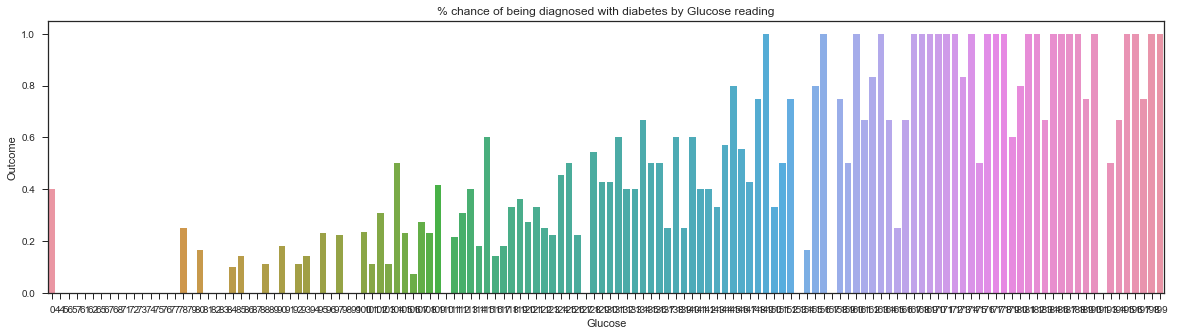

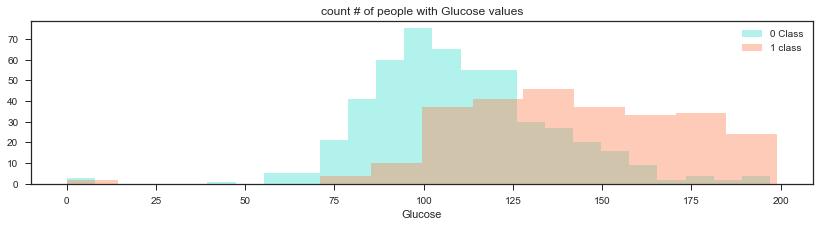

In [ ]:
plt.figure(figsize=(20,5))
glucose_pivot = data.groupby('Glucose').Outcome.mean().reset_index()
sns.barplot(glucose_pivot.Glucose, glucose_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by Glucose reading')
plt.show()

plt.figure(figsize=(14,3))
glucose_pivot = data.groupby('Glucose').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['Glucose'], color='turquoise', kde=False, label='0 Class')
sns.distplot(data[data.Outcome == 1]['Glucose'], color='coral', kde=False, label='1 class')
plt.legend()
plt.title('count # of people with Glucose values')
plt.show()

As expected the glucose feature seems to be highly correlated to the chances of getting diabetes.

We will repeat the same analysis for the other predictors.

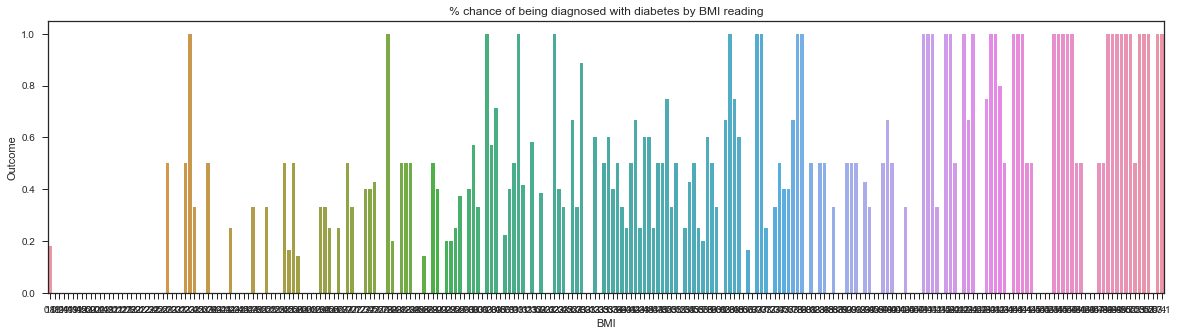

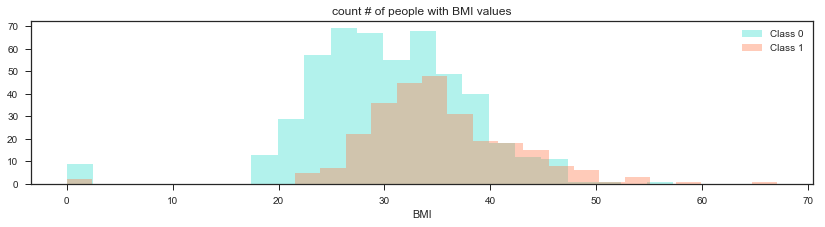

In [ ]:
plt.figure(figsize=(20,5))
BMI_pivot = data.groupby('BMI').Outcome.mean().reset_index()
sns.barplot(BMI_pivot.BMI, BMI_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by BMI reading')
plt.show()

plt.figure(figsize=(14,3))
BMI_pivot = data.groupby('BMI').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['BMI'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data[data.Outcome == 1]['BMI'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with BMI values')
plt.show()

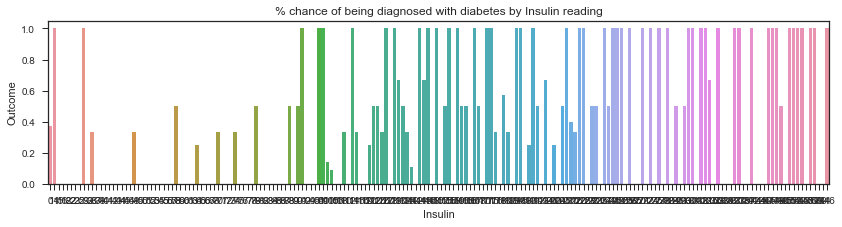

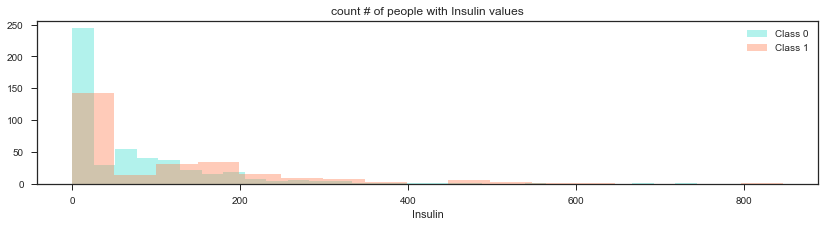

In [ ]:
plt.figure(figsize=(14,3))
Insulin_pivot = data.groupby('Insulin').Outcome.mean().reset_index()
sns.barplot(Insulin_pivot.Insulin, Insulin_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by Insulin reading')
plt.show()

plt.figure(figsize=(14,3))
Insulin_pivot = data.groupby('Insulin').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['Insulin'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data[data.Outcome == 1]['Insulin'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Insulin values')
plt.show()

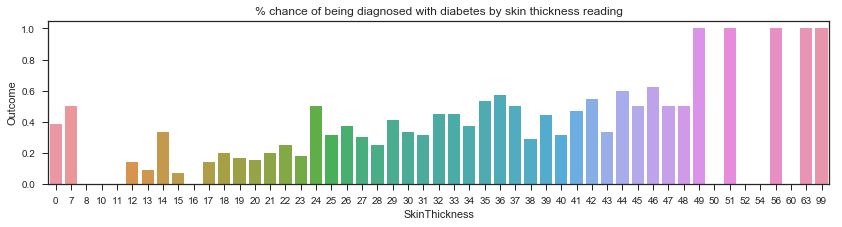

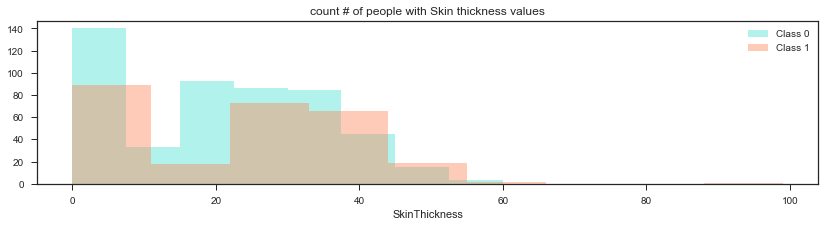

In [ ]:
plt.figure(figsize=(14,3))
SkinThickness_pivot = data.groupby('SkinThickness').Outcome.mean().reset_index()
sns.barplot(SkinThickness_pivot.SkinThickness, SkinThickness_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by skin thickness reading')
plt.show()

plt.figure(figsize=(14,3))
SkinThickness_pivot = data.groupby('SkinThickness').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['SkinThickness'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data[data.Outcome == 1]['SkinThickness'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Skin thickness values')
plt.show()

## Data Selection and Model Fitting

Next, we will normalize the data, which can improve the accuracy of some machine learning algorithms. In the simplest cases, normalization  means adjusting values measured on different scales to a notionally common scale. In more complicated cases, normalization may refer to more sophisticated adjustments where the intention is to bring the entire probability distributions of adjusted values into alignment (e.g. for Normally-distributed variables, putting them all into units of z-value). 

Let's use a train/test split of 80%-20% and 5-fold cross-validation of the data i.e. we will be running the classification 5 times on 5 subsets (or "folds") of data.

At this point we will use all the data except observations having one or more impossible 0 values.  We will consider later whether there are outliers that are likely erroneous data that should also be removed.

In [ ]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data_mod = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]
train, test = train_test_split(data_mod, test_size=0.2)
print(data_mod.shape)
print(train.shape)
print(test.shape)

(724, 9)
(579, 9)
(145, 9)


In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'\
            , 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']
target = 'Outcome'
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

Let's run several different classifiers with cross-validation.  Look at the method *cross_val_score*.  The variable *cv* determines the number of cross-validation folds, in our case 5.  Each of these classifiers (K nearest, Decision tree, SVM with RBF kernel, SVM with linear kernel, and Gaussian Naive Bayes) will run 5 times and the averaged results and variability of the results across folds for each of these is given as the output.

In [ ]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train[features], train[target], cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors  mean accuracy:  71.165 % std:  0.071 %
Decision Tree Classifier  mean accuracy:  71.684 % std:  0.095 %
SVM classifier with RBF kernel  mean accuracy:  67.012 % std:  0.0 %
SVM classifier with linear kernel  mean accuracy:  76.68 % std:  0.102 %
Gaussian Naive Bayes  mean accuracy:  76.155 % std:  0.045 %


It appears that out of all of these, the SVM classifier with linear kernel and Naive Bayes classifier give the best accuracy.  Let's use these models to train on our data.  The method in scikit-learn for Support Vector machines needs import of the the library : *sklearn.svm.SVC*.  Here SVC refers to C-Support Vector Classifiers.

Similary, gaussian Naive Bayes classifier is imported from : *sklearn.naive_bayes import GaussianNB*.  In our example, *GaussianNB* is imported as *gnb()*. Please refer to the import statements.

In [ ]:
final_model_smv_lin = SVC(kernel='linear').fit(train[features], train[target])
final_model_gnb = gnb().fit(train[features], train[target])

In [ ]:
y_test = test['Outcome'].to_frame()
X_test=test.drop(['Outcome'], axis=1)

test accuracy for SVM classifier with a linear kernel: 77.93 %


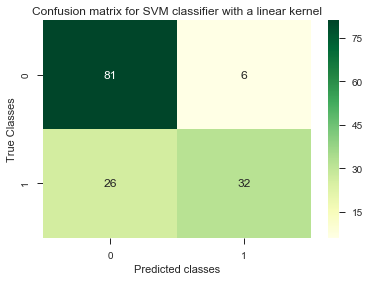

test accuracy for Gaussian naive bayes classifier: 76.55 %


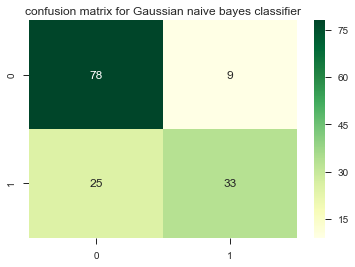

In [ ]:
y_hat_svm = final_model_smv_lin.predict(test[features])
y_hat_gnb = final_model_gnb.predict(test[features])

print('test accuracy for SVM classifier with a linear kernel:'\
      , round(accuracy_score(test[target], y_hat_svm)*100, 2), '%')
plt.title('Confusion matrix for SVM classifier with a linear kernel')
sns.heatmap(confusion_matrix(test[target], y_hat_svm), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

print('test accuracy for Gaussian naive bayes classifier:', \
      round(accuracy_score(test[target], y_hat_gnb)*100, 2),'%')
plt.title('confusion matrix for Gaussian naive bayes classifier')
sns.heatmap(confusion_matrix(test[target], y_hat_gnb), annot=True, cmap="YlGn")
plt.show()

## Observations

As shown above, the SVM linear model does seem to do better from an accuracy perspective for this dataset. It also has fewer false positives than the Naive Bayes model, but higher true negative predictions.
We could choose between them based on whether we want the model to err on the side of caution when predicting someone will have diabetes so that they take preventive care, or be more cautious when predicting a diabetes diagnosis. This will depend on what application this classiﬁer will be used for.


## ROC curve

The ROC Curve is used to show fthe alse positive rate (FPR) against the true positive rate (TPR).

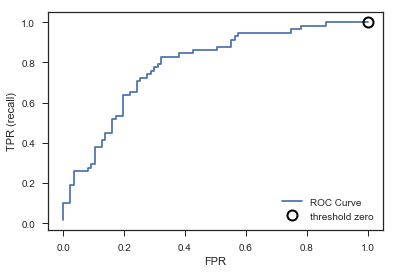

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, final_model_smv_lin.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

For an ROC curve, the ideal curve for a classifier is to be close to the top left: you want a classifier that
produces a high recall (true positive rate) while keeping a low false positive rate.  We need to be careful of overfitting though.  An overfit model will have essentially rote-learned the dataset and will show a great-looking ROC curve for training data but not for test data.

By examining the graph here, we can see that the classfier is doing somewhat okay but there is scope for improvement, as long as we're cautious not to overfit the model.  It is not able to achieve high recall compared to the default   threshold of 0 recall errors. 

The point closest to the top left might be a better operating point than the one chosen by default. By allowing some True Positives to be missed, we will reduce the number of False Positives a lot.  Again, be aware that choosing a threshold should not be done on the test set, but on a separate validation set.


Often either PR or ROC curves are used to determine how well your model is performing. In most cases, a good ROC does not guarantee a good PR curve.  PR curves may be more useful for needle-in-haystack type problems or problems where the "positive" class is more interesting than the negative class, making it a better metric for imbalanced classes.  

Here is a link to a good article on when to use PR and ROC curves and how they should look like in ideal scenarios or when the model is doing well.  

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

(https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python)

In our example, clearly the ROC curve is a better metric because our classes (diabetes vs non-diabetes) are not highly imbalanced and the probabilities are not highly skewed.  However, for the sake of illustrating how to plot a PR curve, we will still go ahead and analyze the PR curve. 


Some more interesting reads on the same topic are:

https://stats.stackexchange.com/questions/7207/roc-vs-precision-and-recall-curves
(https://stats.stackexchange.com/questions/7207/roc-vs-precision-and-recall-curves)

https://stats.stackexchange.com/questions/201750/good-classifier-destroyed-my-precision-recall-curve-what-happened
(https://stats.stackexchange.com/questions/201750/good-classifier-destroyed-my-precision-recall-curve-what-happened)

https://www.biostat.wisc.edu/~page/rocpr.pdf
(https://www.biostat.wisc.edu/~page/rocpr.pdf)


## Precision-Recall curve

The precision_recall_curve() function returns a list of precision and recall values for all possible thresholds (all values that appear in the decision function) in sorted order, so we can plot a curve.


Recollect that we studied about the Precision-Recall (PR) curve in our module.  Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

An Internet search system with high recall but low precision would return many results and include almost all of the relevant pages, but also a lot of junk. A system with high precision but low recall is just the opposite, returning very few results, almost all relevant ones, but would also be missing a lot of other relevant ones. An ideal system with high precision and high recall would return just the ones we're looking for.

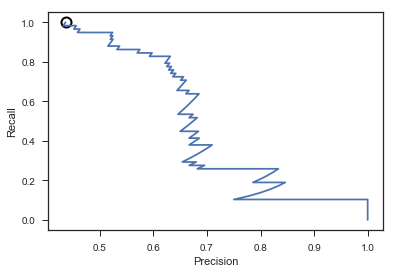

In [ ]:

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
y_test, final_model_smv_lin.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

The closer a curve stays to the upper-right corner, the better the classifier. A point at
the upper right means high precision and high recall for the same threshold. The
curve starts at the top-left corner, corresponding to a very low threshold, classifying
everything as the positive class. Raising the threshold moves the curve toward higher
precision, but also lower recall. Raising the threshold more and more, we get to a situation
where most of the points classified as being positive are true positives, leading
to a very high precision but lower recall. The more the model keeps recall high as
precision goes up, the better.


Looking at this particular curve a bit more, we can see that with this model is not very good. 

Usually, if  we want a much higher precision, we have to sacrifice a lot of recall. In other words, on the left the
curve is relatively flat, meaning that recall does not go down a lot when we require
increased precision. For precision greater than 0.5, each gain in precision costs us a
lot of recall.

Different classifiers can work well in different parts of the curve—that is, at different
operating points.  You may try to use different classifier that scikit learn supports 
https://scikit-learn.org/stable/supervised_learning.html



## Exercise

Try with diﬀerent classiﬁers. Play around with thresholds and see if you can come up with a ROC curve showing high recall.
You may even try improving your models.
 

Recollect that higher the AUC, better the model is at predicting classes (or rather predicting 0s as 0s and 1s as 1s in binary classification).  Refer to Module 3.


Below, we have provided example code for your reference for improvised models yielding to Accuracy of 0.7.  You may pick any of these models and try to plot PR and ROC curves to see how well the model performs.



## Notes

Here are some snippets for your reference. These are code snippets for you to implement other classiﬁers. Please note that this is only for the purpose of showing syntax and procedure. By no means is this the most optimized model for this problem. That is your challenge. 

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
array = data.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)

print('Accuracy: %.2f%%' % (result*100.0))

Accuracy: 75.59%


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)

model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.496% (1.698%)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.951% (4.841%)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.773462064252


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.726555023923


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.75517771702


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.693933697881


In [ ]:
from sklearn.svm import SVC

model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.651025290499


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.770745044429


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_features = 3
num_trees = 100

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.766814764183


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100

model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.766900205058
